# 1) Setup

In [2]:
import numpy as np
from scipy.special import gamma, factorial
from matplotlib import pyplot as plt 

# 2) Metropolis Algorithm
- gamma prior
- poisson likelihood

(array([ 39., 114., 214., 162., 168., 118.,  81.,  44.,  42.,  18.]),
 array([ 4.34525842,  5.28946137,  6.23366432,  7.17786727,  8.12207022,
         9.06627317, 10.01047612, 10.95467907, 11.89888202, 12.84308497,
        13.78728792]),
 <a list of 10 Patch objects>)

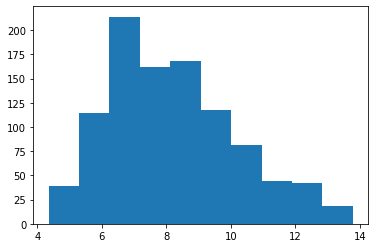

In [3]:
# Prior alpha = 7, beta = 1
# Start with a value of lambda given by 8.0 and compute the prior probability density of observing this value

def prior_prob_density(lam, alpha, beta):
     return(beta**(alpha) * lam**(alpha - 1) * np.exp(-beta*lam) / gamma(alpha))

def likelihood_density(data, lam):
    return(lam**(data) * np.exp(-lam)/ factorial(data))

# Number of iterations
n_iter = 1000
# Starting value of lambda
lambda_current = 8.0
# Prior parameters alpha and beta
alpha = 7.0
beta = 1.0
# Observed data of 9 outages 
data_val = 9

lambda_array = np.zeros(n_iter)

for i in range(n_iter):
    
    # Current value 
    prior = prior_prob_density(lam=lambda_current, alpha=alpha, beta=beta)
    likelihood = likelihood_density(data=data_val, lam=lambda_current)
    posterior_current = likelihood * prior 
    
    # Proposed value
    lambda_proposed = np.random.normal(lambda_current, scale=0.5) # scale is our tuning parameter
    prior = prior_prob_density(lam=lambda_proposed, alpha=alpha, beta=beta)
    likelihood = likelihood_density(data=data_val, lam=lambda_proposed)
    posterior_proposed = likelihood * prior
    
    # Compute the probability of move
    ratio = posterior_proposed / posterior_current
    p_move = min(ratio, 1)
    random_draw = np.random.uniform(0,1)
    if (random_draw < p_move):
        lambda_current = lambda_proposed
        
    # Store the current value
    lambda_array[i] = lambda_current

plt.hist(lambda_array)

In [4]:
# 1) define
#prior params
alpha = 7.0
beta = 1.0
prior_params = [alpha, beta]

#start params
lam = 7.5
start_params = [lam]

#observations
t_op = [10,11,12,13]

#no. of iterations
n_iter = 1000


# 2) Metropolis algorithm

